<a href="https://colab.research.google.com/github/Vasanta2002/Sprint_5/blob/main/JDS_SHR_214_guided_project_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BloomTech Data Science

---


# Logistic Regression
- scikit-learn pipelines
- train/validaiton/test split
- Baseline for classificaiton
- Logistic Regression




In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Libraries for today's project
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# I. Wrangle Data

In [2]:
def wrangle(filepath):
  df = pd.read_csv(filepath, index_col='PassengerId')
  df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
  df['Pclass'] = df['Pclass'].astype('object')
  return df

df = wrangle(DATA_PATH+'titanic/train.csv')
X_test = wrangle(DATA_PATH+'titanic/test.csv')

In [3]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [4]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [5]:
df.shape, X_test.shape

((891, 8), (418, 7))

## II. Split Data

In [6]:
# Split Target Vector from our Feature Matrix
target = 'Survived'
y = df[target]
X = df.drop(columns=target)

In [9]:
# Split our data into a TRAINING set and a VALIDATION set (randomized)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

## III. Establish our baseline



In [11]:
y_train.value_counts(normalize=True).max()

0.6235955056179775

In [13]:
print('Baseline Accuracy Score:', y_train.value_counts(normalize=True).max(),)

Baseline Accuracy Score: 0.6235955056179775


## IV. Build Model

- Why would regular linear regression not work here?

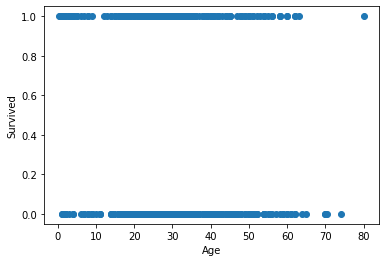

In [14]:
plt.scatter(X_train['Age'], y_train)
plt.xlabel('Age')
plt.ylabel('Survived')

plt.show()

\begin{align}
p  (y=1) = \frac{1}{1+e^{-(b_0+b_1x)}}
\end{align}


What we need for our model pipeline:

- `OneHotEncoder`
- `SimpleImputer`
- `LogisticRegression`

In [15]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression()
)

model.fit(X_train, y_train);

## V. Check Metrics

In [ ]:
# default metric will be accuracy for classficiation when using the .score method (based on model)!
# Remember for Linear Regression mdoel we get r2 value instead!

print('Training Accuracy:',)
print('Validation Accuracy:', )

In [ ]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_val, model.predict(X_val))

In [ ]:
# predict method returns class predictions (Survived = 1, Not Survived = 0)


In [ ]:
# predict_proba method returns Probability estimates.# Default Classification Threshold is 0.5


In [ ]:
## degree of certainity with which the model predicts the person survived (i.e 1) (for all our test samples)
# JUST GRAB THE LAST COLUMN VALUES 
